# Models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../lib')

import numpy as np
import pandas as pd

import torch
import pytorch_common.util as pu

import data as dt
import data.plot as pl

import model as ml

import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

In [3]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [4]:
device_name = 'gpu'

pu.set_device_name(device_name)
pu.set_device_memory(device_name, process_memory_fraction=0.5)

In [5]:
pu.get_device()

device(type='cuda', index=0)

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.__version__

'1.11.0'

## Carga de dataset

1. importamos los archivos de peliculas y ratings preprocesados prebiamente en mongodb:

In [8]:
DATASETS_PATH   = '../datasets'

movies          = pd.read_json(f'{DATASETS_PATH}/movies.json')
interactions    = pd.read_json(f'{DATASETS_PATH}/interactions.json')

In [9]:
len(interactions)

210725

In [10]:
import time

import numpy as np
import torch
from matplotlib import pyplot as plt

from pykeops.torch import LazyTensor

use_cuda = torch.cuda.is_available()
dtype    = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

In [11]:
interactions['user_seq'] =  interactions.user_id.apply(dt.Sequencer().get)
interactions['movie_seq'] =  interactions.movie_id.apply(dt.Sequencer().get)

interactions[['user_seq', 'user_id']].to_json(f'{DATASETS_PATH}/user_seq_id.json')
interactions[['movie_seq', 'movie_id']].to_json(f'{DATASETS_PATH}/movie_seq_id.json')

In [12]:
rm = dt.RatingsMatrix.from_dataframe(interactions, 'user_seq', 'movie_seq', 'rating')
rm.shape

2022-04-25 21:18:37,911 - INFO - Create ratting matrix - computing time: 0:00:09.19


(13281, 22082)

<Figure size 720x432 with 2 Axes>

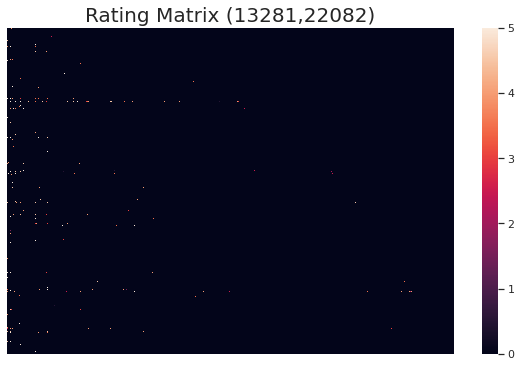

In [13]:
rm.plot()

In [14]:
predictor = ml.KNNUserBasedPredictor(
    rm,
    distance    = ml.CosineDistance(), 
    n_neighbors = 10
)

2022-04-25 21:23:53,746 - INFO - distances matrix - computing time: 0:03:06.06


In [15]:
predictor.predict(user_idx=0, item_idx=0)

tensor(4.2500, device='cuda:0')